# Credit Risk & Customer Retention Analysis – Predictive Modeling and Insights

## Objective:
To build a predictive and analytical solution that helps banks and financial firms:  
- Predict loan/credit card default risk using customer profile, credit score, utilization and transaction behaviour.
- Identify customer churn risk and take proactive retention measures.
- Provide actionable business insights through an interactive dashboard showing risk, churn and product penetration.

# Tools & Libraries Used
- Python
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Sklearn
- Jupyter Notebook
- Snowflake

## 1. Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
df = pd.read_csv('Customer360.csv')

## 2. Exploratory Data Analysis

In [4]:
df.head(10)

,CUSTOMER_ID,AGE,GENDER,INCOME_BRACKET,EMPLOYMENT_STATUS,CITY,CREDIT_SCORE,LOAN_HISTORY,CREDIT_UTILIZATION,DEFAULT_HISTORY,...,RESPONSE_TO_OFFERS,CHURN_FLAG,AVG_MONTHLY_INCOME,AVG_MONTHLY_EXPENSE,AVG_RETAIL_SPEND,AVG_TRAVEL_SPEND,AVG_BILLS_SPEND,DELINQUENCY_COUNT_12M,TOTAL_OVERDUE_DAYS_12M,OVER_BUDGET_RATIO
0,CUST0001,59,Female,3-6 LPA,Salaried,Ahmedabad,562,No Loans,10.11,True,...,Clicked,1,32002.633333,23262.615000,8640.141667,3700.469167,10922.001667,2,10,0.0
1,CUST0002,49,Other,15-25 LPA,Salaried,Ahmedabad,656,3-5 Loans,33.48,False,...,Ignored,0,198365.212500,138507.950000,51624.084167,20119.741667,66764.126667,1,30,0.0
2,CUST0003,35,Female,3-6 LPA,Self-Employed,Bengaluru,560,3-5 Loans,33.73,False,...,Clicked,0,49154.954167,38447.845000,14018.418333,4676.601667,19600.621667,5,140,0.0
3,CUST0004,63,Female,<3 LPA,Unemployed,Kolkata,664,1-2 Loans,38.47,False,...,Clicked,0,8074.589167,5941.880833,2074.025000,1116.963333,2750.894167,1,30,0.0
4,CUST0005,28,Female,3-6 LPA,Self-Employed,Hyderabad,748,1-2 Loans,37.43,False,...,Ignored,0,41412.081667,29206.231667,12136.246667,4498.485000,12571.502500,0,0,0.0
5,CUST0006,41,Male,3-6 LPA,Salaried,Mumbai,677,1-2 Loans,30.18,False,...,Clicked,0,26443.923333,18238.460000,5612.637500,2817.415833,9808.405833,1,15,0.0
6,CUST0007,59,Other,25+ LPA,Salaried,Bengaluru,779,3-5 Loans,33.21,True,...,Ignored,0,250543.881667,177279.959167,59592.893333,20803.702500,96616.107500,1,10,0.0
7,CUST0008,39,Female,6-10 LPA,Self-Employed,Ahmedabad,727,1-2 Loans,45.68,False,...,Ignored,0,59286.804167,43505.600000,16532.320833,7181.165000,19792.112500,1,10,0.0
8,CUST0009,43,Female,25+ LPA,Salaried,Delhi,760,1-2 Loans,32.54,False,...,Ignored,0,282130.824167,196357.572500,71753.463333,26026.645833,98577.464167,1,5,0.0
9,CUST0010,31,Female,6-10 LPA,Student,Kolkata,634,1-2 Loans,42.53,False,...,Clicked,0,29803.286667,22317.266667,8538.906667,3020.232500,10758.128333,1,5,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUSTOMER_ID             1000 non-null   object 
 1   AGE                     1000 non-null   int64  
 2   GENDER                  1000 non-null   object 
 3   INCOME_BRACKET          1000 non-null   object 
 4   EMPLOYMENT_STATUS       1000 non-null   object 
 5   CITY                    1000 non-null   object 
 6   CREDIT_SCORE            1000 non-null   int64  
 7   LOAN_HISTORY            1000 non-null   object 
 8   CREDIT_UTILIZATION      1000 non-null   float64
 9   DEFAULT_HISTORY         1000 non-null   bool   
 10  SAVINGS_ACCOUNT         1000 non-null   int64  
 11  CREDIT_CARD             1000 non-null   int64  
 12  LOAN_TYPE               486 non-null    object 
 13  LOAN_AMOUNT             1000 non-null   int64  
 14  INSURANCE               1000 non-null   i

In [6]:
df.isna().sum()

CUSTOMER_ID                 0
AGE                         0
GENDER                      0
INCOME_BRACKET              0
EMPLOYMENT_STATUS           0
CITY                        0
CREDIT_SCORE                0
LOAN_HISTORY                0
CREDIT_UTILIZATION          0
DEFAULT_HISTORY             0
SAVINGS_ACCOUNT             0
CREDIT_CARD                 0
LOAN_TYPE                 514
LOAN_AMOUNT                 0
INSURANCE                   0
FD_INVESTMENT               0
NET_BANKING_USAGE           0
MOBILE_APP_USAGE            0
COMPLAINTS_RAISED           0
RESPONSE_TO_OFFERS          0
CHURN_FLAG                  0
AVG_MONTHLY_INCOME          0
AVG_MONTHLY_EXPENSE         0
AVG_RETAIL_SPEND            0
AVG_TRAVEL_SPEND            0
AVG_BILLS_SPEND             0
DELINQUENCY_COUNT_12M       0
TOTAL_OVERDUE_DAYS_12M      0
OVER_BUDGET_RATIO           0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,1000,1000,CUST0001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,1000.0,NaN,NaN,NaN,45.379,14.122138,21.0,33.0,46.0,57.0,69.0
GENDER,1000,3,Female,505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INCOME_BRACKET,1000,6,6-10 LPA,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMPLOYMENT_STATUS,1000,5,Salaried,523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CITY,1000,8,Ahmedabad,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDIT_SCORE,1000.0,NaN,NaN,NaN,677.59,59.942447,479.0,635.0,678.0,720.0,850.0
LOAN_HISTORY,1000,4,1-2 Loans,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDIT_UTILIZATION,1000.0,NaN,NaN,NaN,28.9255,16.578512,0.59,15.345,26.77,39.945,91.47
DEFAULT_HISTORY,1000,2,False,858,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Converting the column of default_history from boolean values to binary integers

df['DEFAULT_FLAG'] = df['DEFAULT_HISTORY'].astype(int)

In [14]:
df[['DEFAULT_HISTORY', 'DEFAULT_FLAG']].head()

,DEFAULT_HISTORY,DEFAULT_FLAG
0,True,1
1,False,0
2,False,0
3,False,0
4,False,0


In [15]:
df['DEFAULT_FLAG'].value_counts()

DEFAULT_FLAG
0    858
1    142
Name: count, dtype: int64

In [16]:
# dropping the default_history column

df.drop(columns=['DEFAULT_HISTORY'], inplace=True)

In [17]:
df.head(10)

,CUSTOMER_ID,AGE,GENDER,INCOME_BRACKET,EMPLOYMENT_STATUS,CITY,CREDIT_SCORE,LOAN_HISTORY,CREDIT_UTILIZATION,SAVINGS_ACCOUNT,...,CHURN_FLAG,AVG_MONTHLY_INCOME,AVG_MONTHLY_EXPENSE,AVG_RETAIL_SPEND,AVG_TRAVEL_SPEND,AVG_BILLS_SPEND,DELINQUENCY_COUNT_12M,TOTAL_OVERDUE_DAYS_12M,OVER_BUDGET_RATIO,DEFAULT_FLAG
0,CUST0001,59,Female,3-6 LPA,Salaried,Ahmedabad,562,No Loans,10.11,1,...,1,32002.633333,23262.615000,8640.141667,3700.469167,10922.001667,2,10,0.0,1
1,CUST0002,49,Other,15-25 LPA,Salaried,Ahmedabad,656,3-5 Loans,33.48,1,...,0,198365.212500,138507.950000,51624.084167,20119.741667,66764.126667,1,30,0.0,0
2,CUST0003,35,Female,3-6 LPA,Self-Employed,Bengaluru,560,3-5 Loans,33.73,1,...,0,49154.954167,38447.845000,14018.418333,4676.601667,19600.621667,5,140,0.0,0
3,CUST0004,63,Female,<3 LPA,Unemployed,Kolkata,664,1-2 Loans,38.47,1,...,0,8074.589167,5941.880833,2074.025000,1116.963333,2750.894167,1,30,0.0,0
4,CUST0005,28,Female,3-6 LPA,Self-Employed,Hyderabad,748,1-2 Loans,37.43,1,...,0,41412.081667,29206.231667,12136.246667,4498.485000,12571.502500,0,0,0.0,0
5,CUST0006,41,Male,3-6 LPA,Salaried,Mumbai,677,1-2 Loans,30.18,1,...,0,26443.923333,18238.460000,5612.637500,2817.415833,9808.405833,1,15,0.0,0
6,CUST0007,59,Other,25+ LPA,Salaried,Bengaluru,779,3-5 Loans,33.21,1,...,0,250543.881667,177279.959167,59592.893333,20803.702500,96616.107500,1,10,0.0,1
7,CUST0008,39,Female,6-10 LPA,Self-Employed,Ahmedabad,727,1-2 Loans,45.68,1,...,0,59286.804167,43505.600000,16532.320833,7181.165000,19792.112500,1,10,0.0,0
8,CUST0009,43,Female,25+ LPA,Salaried,Delhi,760,1-2 Loans,32.54,1,...,0,282130.824167,196357.572500,71753.463333,26026.645833,98577.464167,1,5,0.0,0
9,CUST0010,31,Female,6-10 LPA,Student,Kolkata,634,1-2 Loans,42.53,1,...,0,29803.286667,22317.266667,8538.906667,3020.232500,10758.128333,1,5,0.0,0


In [19]:
# Creating data dictionary & expected columns

id_column = ['CUSTOMER_ID']

target_columns = ['DEFAULT_FLAG', 'CHURN_FLAG']

categorical_columns = ['GENDER', 'INCOME_BRACKET', 'EMPLOYMENT_STATUS', 'CITY', 'LOAN_HISTORY', 'LOAN_TYPE', 'RESPONSE_TO_OFFERS']

binary_columns = ['SAVINGS', 'CREDIT_CARD', 'INSURANCE']

numeric_columns = ['AGE', 'CREDIT_SCORE', 'CREDIT_UTILIZATION', 'LOAN_AMOUNT', 'FD_INVESTMENT', 'NET_BANKING_USAGE', 'MOBILE_APP_USAGE',
                   'COMPLAINTS_RAISED', 'AVG_MONTHLY_INCOME', 'AVG_MONTHLY_EXPENSE', 'AVG_RETAIL_SPEND', 'AVG_TRAVEL_SPEND', 'AVG_BILLS_SPEND',
                  'DELINQUENCY_COUNT_12M', 'TOTAL_OVERDUE_DAYS_12M', 'OVER_BUDGET_RATIO']

In [20]:
# Keeping columns which only exist

target_columns = [x for x in target_columns if x in df.columns]
categorical_columns = [x for x in categorical_columns if x in df.columns]
binary_columns = [x for x in binary_columns if x in df.columns]
numeric_columns = [x for x in numeric_columns if x in df.columns]

In [22]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,1000.0,4.537900e+01,1.412214e+01,21.0000,33.000000,46.000000,57.000000,6.900000e+01
CREDIT_SCORE,1000.0,6.775900e+02,5.994245e+01,479.0000,635.000000,678.000000,720.000000,8.500000e+02
CREDIT_UTILIZATION,1000.0,2.892550e+01,1.657851e+01,0.5900,15.345000,26.770000,39.945000,9.147000e+01
LOAN_AMOUNT,1000.0,1.023791e+06,2.128992e+06,0.0000,0.000000,0.000000,799640.750000,9.923698e+06
FD_INVESTMENT,1000.0,3.110996e+05,5.649623e+05,0.0000,0.000000,0.000000,396429.500000,1.997134e+06
NET_BANKING_USAGE,1000.0,9.996000e+00,3.172073e+00,2.0000,8.000000,10.000000,12.000000,2.100000e+01
MOBILE_APP_USAGE,1000.0,1.986000e+01,4.366173e+00,6.0000,17.000000,20.000000,23.000000,3.900000e+01
COMPLAINTS_RAISED,1000.0,4.810000e-01,7.643450e-01,0.0000,0.000000,0.000000,1.000000,3.000000e+00
AVG_MONTHLY_INCOME,1000.0,7.966523e+04,7.046280e+04,8000.0000,28256.532292,57352.067917,104389.135000,3.892192e+05
AVG_MONTHLY_EXPENSE,1000.0,5.637437e+04,4.972420e+04,5334.1875,19969.526458,40379.744167,74615.528125,2.610431e+05


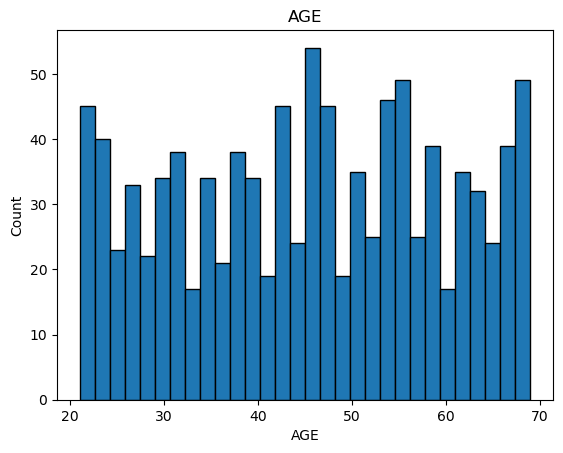

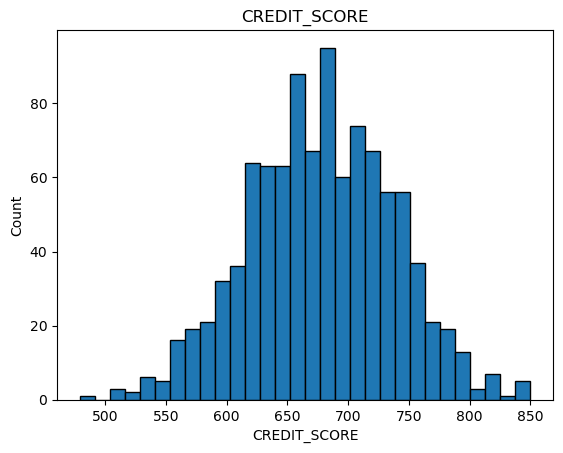

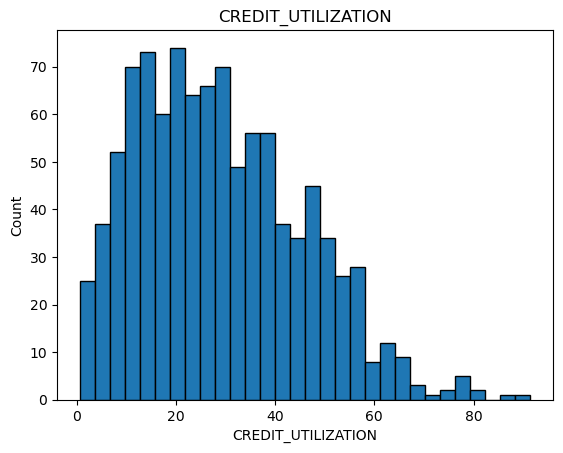

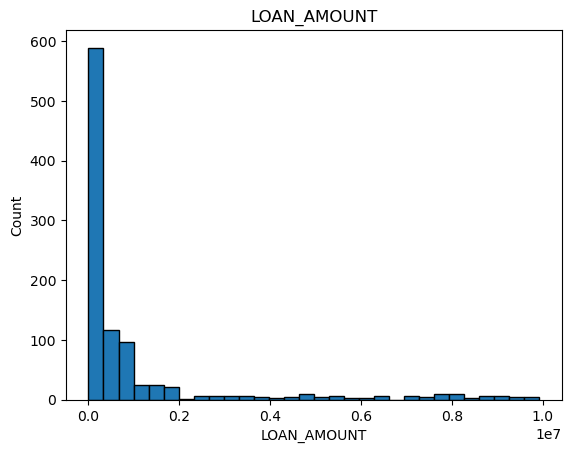

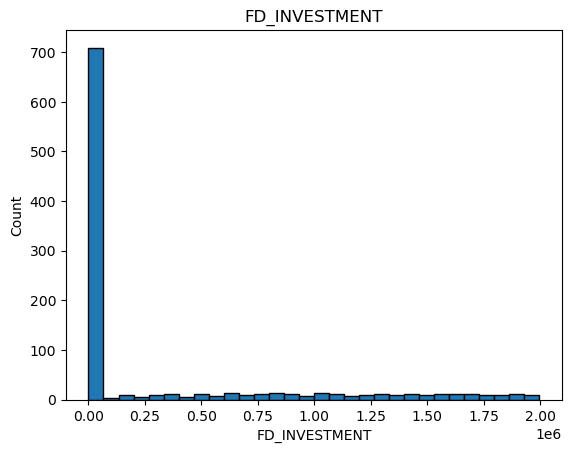

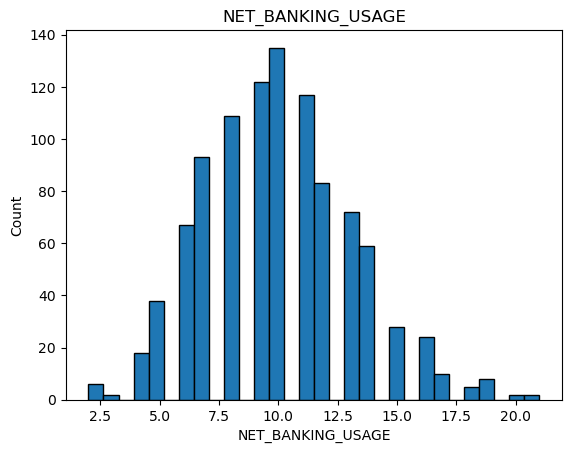

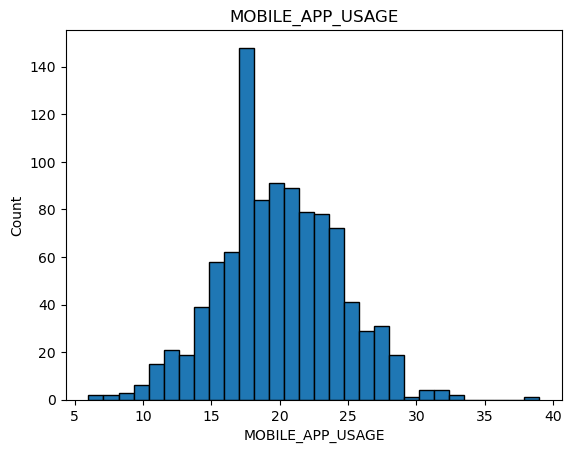

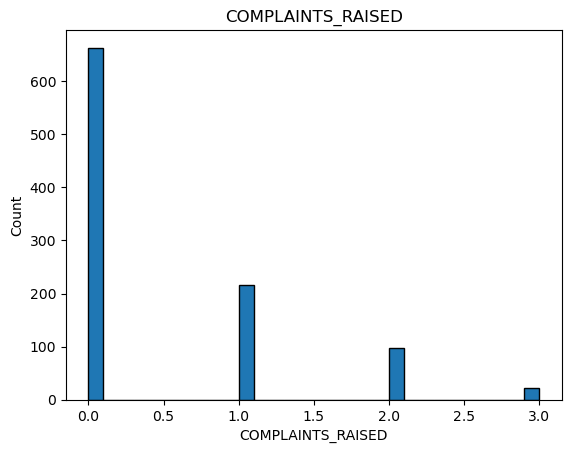

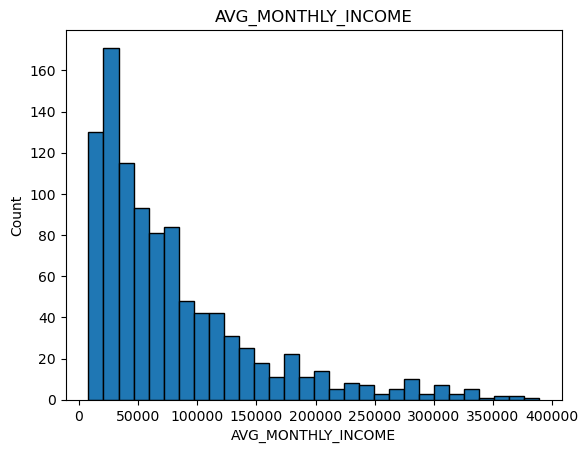

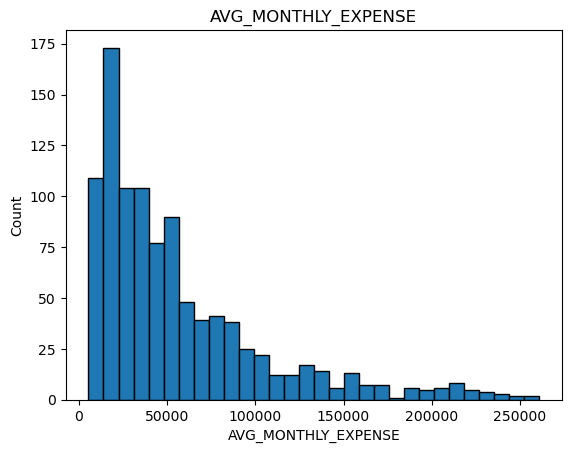

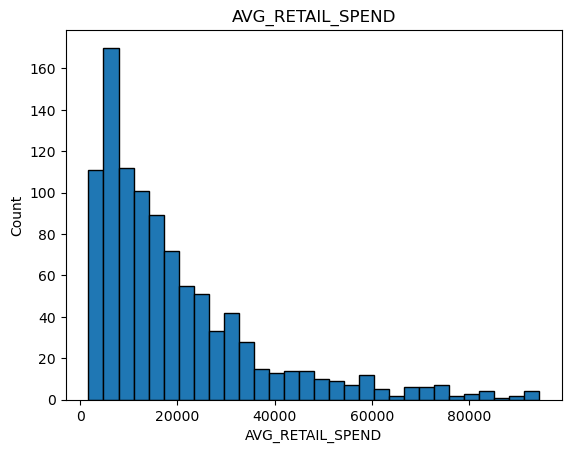

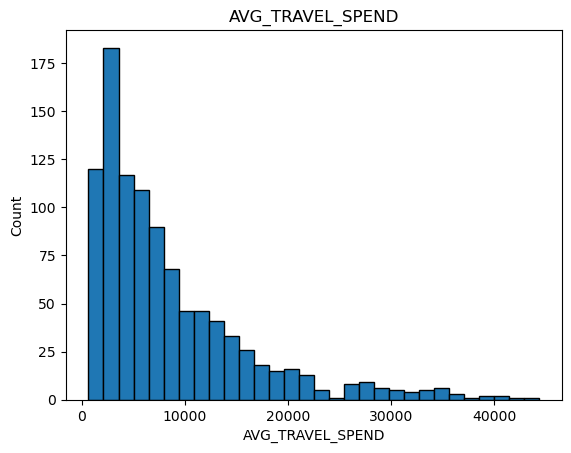

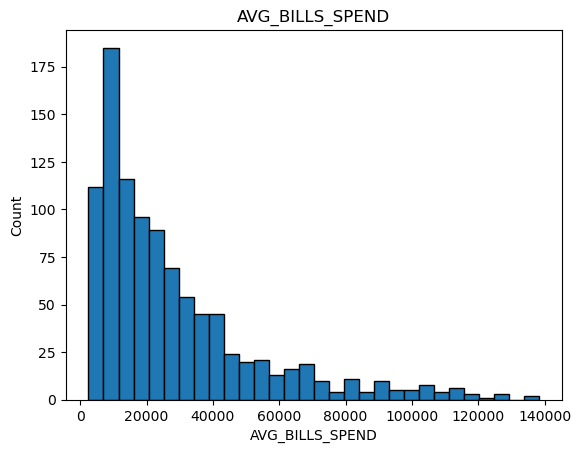

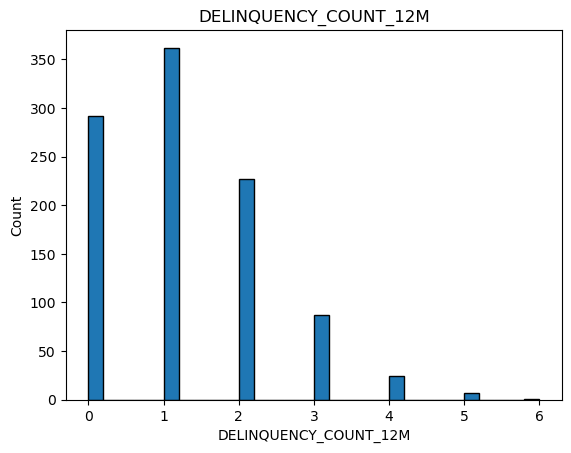

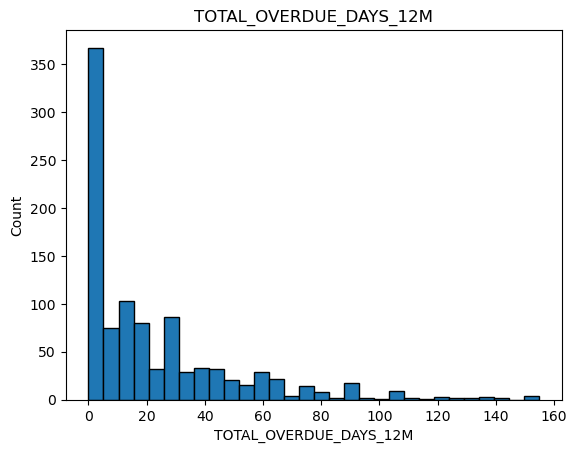

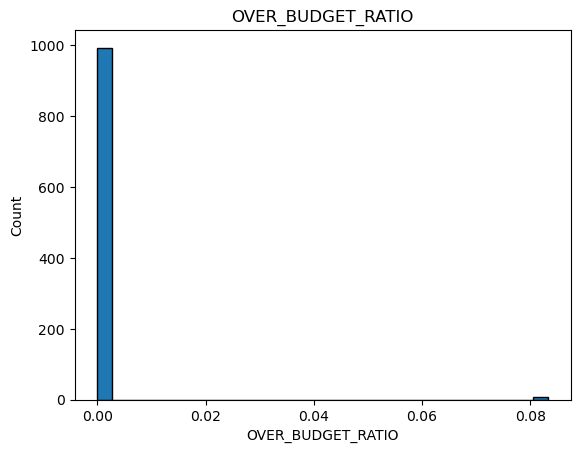

In [24]:
# Univariate analysis
# Checking numeric distributions & outliers

for x in numeric_columns:
    df[x].plot(kind='hist', bins=30, edgecolor='black')
    plot.title(x)
    plot.xlabel(x)
    plot.ylabel('Count')
    plot.show()

### Insights:
* Most of our customers are between 45 and 70 years old. These age groups also seem more active in taking loans or investing, likely because their income grows with age.
* The credit score distribution looks healthy overall. Most customers have scores between 600–750, which is average. Only a small group has very high scores above 800, while some have very low scores below 500, these are high-risk customers to watch.
* In terms of credit usage, most customers are using 10% to 40% of their available credit, which is generally healthy. Only a small number are using above 60%, which could signal financial stress.
* Loan amounts are mostly on the smaller side. As loan size increases, the number of borrowers drops quickly. This means the bank is handling a large volume of small-to-medium loans, with only a few big-ticket loans.
* Over 700 customers have fixed deposits of around ₹1,00,000. Fewer customers have larger deposits ranging between ₹2.5 lakh and ₹20 lakh.
*Digital engagement is strong:
* 1. Net Banking: Most customers use it 5–15 times a year, mainly for high-value transactions.
* 2. Mobile App: Regularly used by customers, with most logging in 15–29 times a year. A few heavy users log in more than 40 times.
* Customer service looks mixed: More than 600 customers never raised a complaint, but some have raised up to 3 complaints. These complaints should be reviewed carefully to check if they point to issues in service or products.
* Income levels are skewed: Most customers earn between ₹20,000–₹1.5 lakh per month, while a smaller group earns ₹2 lakh+. These high earners are potential premium customers for cross-selling investments or wealth products.
* Spending behavior:
* 1. Average monthly expense peaks around ₹20,000–₹22,000.
* 2. Some customers spend far more (₹50,000–₹2.5 lakh), which should be analyzed to see if it’s sensible spending or risky behavior.
* 3. Retail spending is mostly ₹2,000–₹3,000, while travel spending is around ₹1,000–₹2,000. A small group spends ₹20,000+ on travel and ₹40,000+ on retail, making them potential high-value customers.
* 4. Bills spending peaks around ₹8,000, but a few customers spend more than ₹80,000 per month, this needs closer review.
* Repayment behavior is a concern:
* 1. Around 350+ customers have been delinquent once.
* 2. About 200–250 customers have been delinquent twice, and fewer but notable customers have been delinquent 3+ times.
* 3. Some customers have overdue days ranging from 120 to 160 days, which is a serious red flag for the bank.
* On the positive side, 350+ customers have never missed payments, this is the most reliable segment.

In [26]:
# Outlier check

outlier_report = {}
for x in numeric_columns:
    q1, q3 = df[x].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outlier_count = ((df[x] < lower) | (df[x] > upper)).sum()
    outlier_report[x] = outlier_count

outlier_report

{'AGE': 0,
 'CREDIT_SCORE': 4,
 'CREDIT_UTILIZATION': 8,
 'LOAN_AMOUNT': 126,
 'FD_INVESTMENT': 160,
 'NET_BANKING_USAGE': 12,
 'MOBILE_APP_USAGE': 5,
 'COMPLAINTS_RAISED': 23,
 'AVG_MONTHLY_INCOME': 59,
 'AVG_MONTHLY_EXPENSE': 57,
 'AVG_RETAIL_SPEND': 61,
 'AVG_TRAVEL_SPEND': 54,
 'AVG_BILLS_SPEND': 64,
 'DELINQUENCY_COUNT_12M': 1,
 'TOTAL_OVERDUE_DAYS_12M': 48,
 'OVER_BUDGET_RATIO': 7}

### Insights:
#### Outlier Summary (Numeric Columns)
* **AGE** - 0 outliers  
Customer age distribution looks consistent; no extreme values.
* **CREDIT_SCORE** - 4 outliers  
A few customers have unusually low or high credit scores compared to the rest.
* **CREDIT_UTILIZATION** - 8 outliers  
Very few customers are either under-utilizing (near 0%) or over-utilizing (>80%) their credit. These customers represent risky segments.
* **LOAN_AMOUNT** - 126 outliers  
Significant number of customers with unusually high loan amounts compared to the majority (who take smaller loans). This is expected, since loans are often skewed, but it’s still important for risk monitoring.
* **FD_INVESTMENT** - 160 outliers  
Many customers have much higher fixed deposits than the rest. These are likely high-value customers, and not necessarily bad outliers.
* **NET_BANKING_USAGE** - 12 outliers  
Some customers use net banking far more (or far less) than others. Could be power users or digitally inactive customers.
* **MOBILE_APP_USAGE** - 5 outliers  
A handful of customers are heavy app users, interesting for digital engagement strategies.
* **COMPLAINTS_RAISED** - 23 outliers  
A small group of customers has raised unusually high complaints (3+). This should be investigated for service issues.
* **AVG_MONTHLY_INCOME** - 59 outliers  
Some customers earn significantly more than the average. These represent premium segments.
* **AVG_MONTHLY_EXPENSE** - 57 outliers  
Some customers spend far more than their peers, could signal wealthy clients or overspending risks.
* **AVG_RETAIL_SPEND** - 61 outliers  
Few customers spend abnormally high amounts on retail, marking them as big spenders.
* **AVG_TRAVEL_SPEND** - 54 outliers  
Some customers spend excessively on travel, potential affluent or corporate clients.
* **AVG_BILLS_SPEND** - 64 outliers  
A handful of customers spend very high amounts on bills, could be business-related or high-net-worth households.
* **DELINQUENCY_COUNT_12M** - 1 outlier  
Only one customer with an extreme delinquency count, very high-risk profile.
* **TOTAL_OVERDUE_DAYS_12M** - 48 outliers  
Some customers have very high overdue days (120–160), which is a serious credit risk warning.
* **OVER_BUDGET_RATIO** - 7 outliers  
A small group consistently spends more than they earn, which makes them risky customers for lending.

In [28]:
# Categorical distributions

for x in categorical_columns + binary_columns:
    print(f"\n{x}")
    print(df[x].value_counts(dropna=False))
    print((df[x].value_counts(normalize=True)*100).round(2))


GENDER
GENDER
Female    505
Male      454
Other      41
Name: count, dtype: int64
GENDER
Female    50.5
Male      45.4
Other      4.1
Name: proportion, dtype: float64

INCOME_BRACKET
INCOME_BRACKET
6-10 LPA     242
3-6 LPA      240
<3 LPA       165
10-15 LPA    151
15-25 LPA    126
25+ LPA       76
Name: count, dtype: int64
INCOME_BRACKET
6-10 LPA     24.2
3-6 LPA      24.0
<3 LPA       16.5
10-15 LPA    15.1
15-25 LPA    12.6
25+ LPA       7.6
Name: proportion, dtype: float64

EMPLOYMENT_STATUS
EMPLOYMENT_STATUS
Salaried         523
Self-Employed    271
Student          112
Unemployed        50
Retired           44
Name: count, dtype: int64
EMPLOYMENT_STATUS
Salaried         52.3
Self-Employed    27.1
Student          11.2
Unemployed        5.0
Retired           4.4
Name: proportion, dtype: float64

CITY
CITY
Ahmedabad    135
Pune         134
Hyderabad    131
Delhi        126
Kolkata      125
Chennai      123
Bengaluru    120
Mumbai       106
Name: count, dtype: int64
CITY
Ahmedabad 

### Categorical Insights  
**Gender**  
* Customer base is balanced, with 50.5% female and 45.4% male.  
* 4.1% identify as other gender, showing inclusivity in the dataset.  
* Marketing strategies can be tailored to both male and female segments without strong bias.  
**Income Bracket**    
* Largest segments: 6–10 LPA (24.2%) and 3–6 LPA (24.0%).  
* 16.5% earn less than 3 LPA (low-income customers).  
* 7.6% earn 25+ LPA, a premium segment.  
* The bank has a wide spread of customers, but the core audience is middle-income. Premium offerings should target the high earners.  
**Employment Status**  
* 52.3% are salaried, the most stable segment.  
* 27.1% self-employed customers offer good opportunities but also higher risk.  
* 11.2% students — a young segment for long-term relationships.  
* Unemployed (5%) and retired (4.4%) are smaller groups.  
* Focus on salaried & self-employed for loan products; students can be nurtured with entry-level products.  
**City Distribution**  
* Top cities: Ahmedabad (13.5%), Pune (13.4%), Hyderabad (13.1%), Delhi (12.6%), Kolkata (12.5%).  
* Mumbai has only 10.6% despite being a financial hub.  
* Growth opportunity exists in Mumbai & Bengaluru, while existing strongholds are in tier-1 cities like Ahmedabad & Pune.  
**Loan History**  
* 39.6% have 1–2 loans, showing moderate borrowing.  
* 26.2% have no loans - new lending opportunities.  
* 10.3% have 6+ loans, a high-risk heavy borrower segment.  
* New loans can be cross-sold to “no loans” customers, while high-loan customers should be closely monitored.  
**Loan Type**  
* Among loan holders: 50.6% personal loans, 29% home loans, 20.3% auto loans.  
* 514 customers (51%) have no loans.  
* Personal loans dominate, but home loans offer a stable long-term relationship.  
**Response to Offers**  
* 56.3% ignored offers, 24.2% accepted, 19.5% clicked but didn’t convert.  
* High non-engagement rate — marketing strategy needs improvement. Target the “clicked” group for higher conversions.  
**Credit Card Ownership**  
* 67.4% own a credit card, 32.6% don’t.  
* Good penetration, but there’s still room to expand credit card offerings to one-third of the customer base.  
**Insurance**  
* 39.2% have insurance, while 60.8% don’t.  
* Big opportunity to cross-sell insurance products to majority of customers.  

In [29]:
# Bivariate Analysis
# Numeric vs targets

def rate_mean_by_target(numeric_columns, target_columns):
    z = df.groupby(target_columns)[numeric_columns].agg(['count', 'mean', 'median', 'std'])
    print(f"\n{numeric_columns} by {target_columns}")
    display(z)

for x in target_columns:
    for y in numeric_columns:
        rate_mean_by_target(y, x)


AGE by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,45.203963,46.0,14.283972
1,142,46.436620,46.0,13.099437



CREDIT_SCORE by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,678.015152,678.5,58.592961
1,142,675.021127,677.0,67.698483



CREDIT_UTILIZATION by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,29.003601,26.910,16.506899
1,142,28.453592,25.865,17.056842



LOAN_AMOUNT by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,1.032192e+06,0.0,2.156088e+06
1,142,9.730306e+05,234249.0,1.963678e+06



FD_INVESTMENT by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,309931.150350,0.0,558677.379350
1,142,318159.676056,0.0,603581.287597



NET_BANKING_USAGE by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,9.960373,10.0,3.174183
1,142,10.211268,10.0,3.161899



MOBILE_APP_USAGE by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,19.896270,20.0,4.382495
1,142,19.640845,20.0,4.274851



COMPLAINTS_RAISED by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,0.497669,0.0,0.776324
1,142,0.380282,0.0,0.681388



AVG_MONTHLY_INCOME by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,79445.413295,57057.720000,70604.985330
1,142,80993.405370,61008.035417,69830.060635



AVG_MONTHLY_EXPENSE by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,56190.297118,40212.371250,49782.276575
1,142,57486.611896,42522.012917,49532.353426



AVG_RETAIL_SPEND by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,19668.196192,14237.938750,17453.664104
1,142,19856.267629,14638.270417,17209.693389



AVG_TRAVEL_SPEND by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,8444.893641,5940.403333,7672.404154
1,142,8620.199742,6366.003333,7200.272195



AVG_BILLS_SPEND by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,28072.238416,19861.877917,25109.163066
1,142,28998.738756,21267.525833,25538.061425



DELINQUENCY_COUNT_12M by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,1.236597,1.0,1.097877
1,142,1.077465,1.0,0.989834



TOTAL_OVERDUE_DAYS_12M by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,24.539627,15.0,29.174627
1,142,19.894366,15.0,22.451432



OVER_BUDGET_RATIO by DEFAULT_FLAG


,count,mean,median,std
DEFAULT_FLAG,,,,
0,858,0.000486,0.0,0.006347
1,142,0.001174,0.0,0.009855



AGE by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,45.341289,46.0,14.160895
1,162,45.574074,46.0,13.961707



CREDIT_SCORE by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,677.307876,678.0,59.855088
1,162,679.049383,678.5,60.557944



CREDIT_UTILIZATION by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,29.027100,26.930,16.562234
1,162,28.399938,25.535,16.704106



LOAN_AMOUNT by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,1.018682e+06,0.0,2.126097e+06
1,162,1.050222e+06,0.0,2.150340e+06



FD_INVESTMENT by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,310178.343675,0.0,564552.848997
1,162,315865.117284,0.0,568807.425527



NET_BANKING_USAGE by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,10.056086,10.0,3.183433
1,162,9.685185,10.0,3.103739



MOBILE_APP_USAGE by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,19.781623,20.0,4.412028
1,162,20.265432,20.0,4.109969



COMPLAINTS_RAISED by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,0.48568,0.0,0.772379
1,162,0.45679,0.0,0.723164



AVG_MONTHLY_INCOME by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,79385.708260,57352.067917,71220.266165
1,162,81111.139805,57546.172917,66598.824225



AVG_MONTHLY_EXPENSE by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,56153.145942,40345.301250,50219.392995
1,162,57518.750108,41061.349167,47212.144077



AVG_RETAIL_SPEND by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,19653.068398,14278.38625,17572.627543
1,162,19911.302582,14108.68500,16599.162321



AVG_TRAVEL_SPEND by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,8446.366237,5957.948333,7704.239779
1,162,8590.939511,6062.939583,7083.566274



AVG_BILLS_SPEND by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,28047.398405,19929.53500,25391.246863
1,162,29012.849388,20141.78375,23985.405291



DELINQUENCY_COUNT_12M by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,1.226730,1.0,1.084771
1,162,1.148148,1.0,1.081879



TOTAL_OVERDUE_DAYS_12M by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,24.122912,15.0,28.256386
1,162,22.623457,15.0,28.909801



OVER_BUDGET_RATIO by CHURN_FLAG


,count,mean,median,std
CHURN_FLAG,,,,
0,838,0.000696,0.0,0.007589
1,162,0.000000,0.0,0.000000


### Insights from Default Analysis (Default_Flag: 1 = Defaulted, 0 = Not Defaulted)
**Age**  
* Average age is similar for both groups (≈45–46 years).  
* This suggests age is not a major driver of default.  
**Credit Score**  
* Both groups have very similar average scores (~675–678).  
* But the spread (std) is higher for defaulters, meaning their credit scores vary more, with some extremely poor scorers.  
* Insight: A few risky profiles are pulling down the group.  
**Credit Utilization**  
* Both groups hover around ~28–29%.  
* No strong difference → credit utilization alone doesn’t separate defaulters from safe customers.  
**Loan Amount**  
* Non-defaulters have a slightly higher mean loan (₹10.3 lakh) vs. defaulters (₹9.7 lakh).  
* Median for defaulters is higher though (₹2.3 lakh vs. ₹0).  
* Insight: Defaults are more common in medium-ticket loans, while very large loans may be better underwritten and monitored.  
**FD Investment**  
* Both groups have similar FD levels (~₹3 lakh average).  
* This means FD holdings don’t protect against default risk.  
**Net Banking & Mobile Usage**  
* Usage levels are almost identical across groups (~10 net banking logins, ~20 mobile app logins).  
* Engagement with digital channels doesn’t predict default.  
**Complaints Raised**  
* Non-defaulters raised slightly more complaints (0.49 vs. 0.38).  
* Counterintuitive, but it could mean engaged customers who complain get issues resolved faster, reducing risk.  
**Income & Expenses**  
* Both groups have similar income (₹79k vs ₹81k) and expenses (₹56k vs ₹57k).  
* Income/expense ratio does not clearly distinguish defaulters.  
**Spending Patterns (Retail, Travel, Bills)**  
* Very close between the two groups.  
* Spending behavior does not strongly link to default.  
**Delinquency Count & Overdue Days** 
* Surprisingly, non-defaulters have slightly higher delinquency counts and overdue days (24 vs. 19 days).  
* Possible reason: these were short-term issues that customers later corrected, so they didn’t end in default.  
* True defaulters may not accumulate as many overdue days because they default quickly and stop paying altogether.  
**Over Budget Ratio**  
* Slightly higher for defaulters (0.0011 vs. 0.0004), but negligible difference.  
**Default Key Takeaway:**  
* Default is not strongly explained by demographics, income, or usage in this dataset. The main hints are:  
* Medium loan amounts are riskier.  
* Wider credit score variability among defaulters.  
* Lower complaints for defaulters - could indicate disengagement before default.

### Insights from Churn Analysis (Churn_Flag: 1 = Churned, 0 = Active)
**Age**  
* Both churned and active customers are ~45 years old.  
* Age doesn’t drive churn.  
**Credit Score**  
* Almost identical (~678–679).  
* No impact on churn.  
**Credit Utilization**  
* Very similar (~28–29%). 
* Doesn’t explain churn.  
**Loan Amount**  
* Both groups average ~₹10 lakh loans, no meaningful difference.  
**FD Investment**  
* Both groups ~₹3.1 lakh average FDs, not predictive.  
**Net Banking Usage**  
* Active customers use slightly more net banking (10 vs. 9.6 times).  
* Suggests digital engagement may help reduce churn.  
**Mobile App Usage**  
* Churned customers actually used the app slightly more (20.2 vs. 19.7 times).  
* So higher app usage doesn’t guarantee retention → maybe they left due to service issues despite usage.  
**Complaints Raised**  
* Both groups similar (0.48 vs. 0.45 complaints).  
* Complaints don’t strongly link to churn.  
**Income & Expenses**  
* Churned customers earn slightly more (₹81k vs. ₹79k) and spend slightly more.  
* Suggests higher income customers may churn if not offered premium experiences.  
**Spending Patterns (Retail, Travel, Bills)**  
* Very close between churned and non-churned customers.  
* Not a strong churn driver.  
**Delinquency & Overdue**  
* Both groups show similar delinquency and overdue days.  
* Not predictive of churn.  
**Over Budget Ratio**  
* Active customers show a small average over-budget ratio, churned customers show zero.  
* Suggests churned customers may have been financially cautious, not necessarily bad customers.  
**Churn Key Takeaway:**  
* Digital usage is slightly lower among churned customers - improving engagement may help retention.  
* High-income customers are more likely to churn if not given premium offers.  
* No strong behavioral differences otherwise - churn could be influenced by external factors like competitor offers, service experience or product relevance.  

In [30]:
# Bivariate analysis
# categorical vs targets

def category_rate_table(categorical_columns, target_columns):
    tab = pd.crosstab(df[categorical_columns], df[target_columns], normalize='index')*100
    count = pd.crosstab(df[categorical_columns], df[target_columns])
    return tab.round(2).join(count.rename(columns=lambda x: f"count_{x}"))

for x in target_columns:
    for y in categorical_columns + binary_columns:
        print(f"\n{y} vs {x}")
        display(category_rate_table(y, x))


GENDER vs DEFAULT_FLAG


DEFAULT_FLAG,0,1,count_0,count_1
GENDER,,,,
Female,86.14,13.86,435,70
Male,85.02,14.98,386,68
Other,90.24,9.76,37,4



INCOME_BRACKET vs DEFAULT_FLAG


DEFAULT_FLAG,0,1,count_0,count_1
INCOME_BRACKET,,,,
10-15 LPA,84.77,15.23,128,23
15-25 LPA,83.33,16.67,105,21
25+ LPA,86.84,13.16,66,10
3-6 LPA,87.08,12.92,209,31
6-10 LPA,87.19,12.81,211,31
<3 LPA,84.24,15.76,139,26



EMPLOYMENT_STATUS vs DEFAULT_FLAG


DEFAULT_FLAG,0,1,count_0,count_1
EMPLOYMENT_STATUS,,,,
Retired,90.91,9.09,40,4
Salaried,84.51,15.49,442,81
Self-Employed,85.98,14.02,233,38
Student,87.50,12.50,98,14
Unemployed,90.00,10.00,45,5



CITY vs DEFAULT_FLAG


DEFAULT_FLAG,0,1,count_0,count_1
CITY,,,,
Ahmedabad,83.70,16.30,113,22
Bengaluru,82.50,17.50,99,21
Chennai,91.87,8.13,113,10
Delhi,87.30,12.70,110,16
Hyderabad,84.73,15.27,111,20
Kolkata,83.20,16.80,104,21
Mumbai,84.91,15.09,90,16
Pune,88.06,11.94,118,16



LOAN_HISTORY vs DEFAULT_FLAG


DEFAULT_FLAG,0,1,count_0,count_1
LOAN_HISTORY,,,,
1-2 Loans,91.67,8.33,363,33
3-5 Loans,71.55,28.45,171,68
6+ Loans,76.70,23.30,79,24
No Loans,93.51,6.49,245,17



LOAN_TYPE vs DEFAULT_FLAG


DEFAULT_FLAG,0,1,count_0,count_1
LOAN_TYPE,,,,
Auto Loan,83.84,16.16,83,16
Home Loan,85.11,14.89,120,21
Personal Loan,84.55,15.45,208,38



RESPONSE_TO_OFFERS vs DEFAULT_FLAG


DEFAULT_FLAG,0,1,count_0,count_1
RESPONSE_TO_OFFERS,,,,
Accepted,85.95,14.05,208,34
Clicked,84.62,15.38,165,30
Ignored,86.15,13.85,485,78



CREDIT_CARD vs DEFAULT_FLAG


DEFAULT_FLAG,0,1,count_0,count_1
CREDIT_CARD,,,,
0,85.89,14.11,280,46
1,85.76,14.24,578,96



INSURANCE vs DEFAULT_FLAG


DEFAULT_FLAG,0,1,count_0,count_1
INSURANCE,,,,
0,86.68,13.32,527,81
1,84.44,15.56,331,61



GENDER vs CHURN_FLAG


CHURN_FLAG,0,1,count_0,count_1
GENDER,,,,
Female,83.56,16.44,422,83
Male,83.92,16.08,381,73
Other,85.37,14.63,35,6



INCOME_BRACKET vs CHURN_FLAG


CHURN_FLAG,0,1,count_0,count_1
INCOME_BRACKET,,,,
10-15 LPA,84.77,15.23,128,23
15-25 LPA,82.54,17.46,104,22
25+ LPA,85.53,14.47,65,11
3-6 LPA,83.33,16.67,200,40
6-10 LPA,82.23,17.77,199,43
<3 LPA,86.06,13.94,142,23



EMPLOYMENT_STATUS vs CHURN_FLAG


CHURN_FLAG,0,1,count_0,count_1
EMPLOYMENT_STATUS,,,,
Retired,86.36,13.64,38,6
Salaried,82.60,17.40,432,91
Self-Employed,82.29,17.71,223,48
Student,87.50,12.50,98,14
Unemployed,94.00,6.00,47,3



CITY vs CHURN_FLAG


CHURN_FLAG,0,1,count_0,count_1
CITY,,,,
Ahmedabad,85.19,14.81,115,20
Bengaluru,82.50,17.50,99,21
Chennai,83.74,16.26,103,20
Delhi,85.71,14.29,108,18
Hyderabad,81.68,18.32,107,24
Kolkata,84.00,16.00,105,20
Mumbai,81.13,18.87,86,20
Pune,85.82,14.18,115,19



LOAN_HISTORY vs CHURN_FLAG


CHURN_FLAG,0,1,count_0,count_1
LOAN_HISTORY,,,,
1-2 Loans,86.62,13.38,343,53
3-5 Loans,80.33,19.67,192,47
6+ Loans,82.52,17.48,85,18
No Loans,83.21,16.79,218,44



LOAN_TYPE vs CHURN_FLAG


CHURN_FLAG,0,1,count_0,count_1
LOAN_TYPE,,,,
Auto Loan,83.84,16.16,83,16
Home Loan,83.69,16.31,118,23
Personal Loan,84.55,15.45,208,38



RESPONSE_TO_OFFERS vs CHURN_FLAG


CHURN_FLAG,0,1,count_0,count_1
RESPONSE_TO_OFFERS,,,,
Accepted,83.47,16.53,202,40
Clicked,83.59,16.41,163,32
Ignored,84.01,15.99,473,90



CREDIT_CARD vs CHURN_FLAG


CHURN_FLAG,0,1,count_0,count_1
CREDIT_CARD,,,,
0,85.28,14.72,278,48
1,83.09,16.91,560,114



INSURANCE vs CHURN_FLAG


CHURN_FLAG,0,1,count_0,count_1
INSURANCE,,,,
0,83.72,16.28,509,99
1,83.93,16.07,329,63


### Insights
#### Default Risk (DEFAULT_FLAG vs Categorical Features) 
**Gender**  
* Default rates are similar for both male (15%) and female (14%).  
* Customers who identified as "Other" have the lowest default rate (≈10%).  
* Gender does not appear to be a strong driver of default. 
**Income Bracket**  
* Customers earning 3–6 LPA and 6–10 LPA have slightly lower default rates (~13%).  
* Higher-income customers (15–25 LPA) actually show a higher default rate (~17%).  
* Earning more does not always mean lower risk; mid-income customers are managing credit better.  
**Employment Status**  
* Salaried customers have the highest default rate (~15%).  
* Retired and unemployed customers have the lowest default rates (~9–10%).  
* Salaried group is bigger in size, so even small % defaults here matter more to overall portfolio risk.  
**City**  
* Default risk is higher in Bengaluru, Kolkata, and Ahmedabad (~16–17%).  
* Chennai and Pune have the lowest defaults (~8–12%).  
* City-level strategies could help manage risk (example: stricter screening in high-default cities).  
**Loan History**  
* Customers with 3–5 loans (28%) and 6+ loans (23%) have the highest default risk.  
* Customers with no loan history have the lowest default risk (6%).  
* Multiple loans are a red flag, these customers are much more likely to default.  
**Loan Type**  
* Default rates are fairly similar across auto, home and personal loans (~15%).  
* Loan type does not strongly affect default.  
**Response to Offers**  
* Whether a customer ignored, clicked, or accepted offers, default rates remain ~14–15%.  
* Marketing offer response does not predict default risk.  
**Credit Card & Insurance**  
* Credit card holders (14.2%) and non-holders (14.1%) have nearly the same default rate.  
* Insurance holders have slightly higher default (15.5%) than non-holders (13.3%).  
* Product ownership is not a strong signal of default.  

#### Churn Risk (CHURN_FLAG vs Categorical Features)  
**Gender**  
* Churn rates are almost identical across male, female, and other (~15–16%).  
* Gender is not a churn driver.  
**Income Bracket**  
* 3–6 LPA and 6–10 LPA income groups churn more (~17%).  
* <3 LPA and 25+ LPA churn less (~14%).  
* Mid-income groups need closer engagement while high-income customers are more loyal.  
**Employment Status**  
* Salaried and self-employed customers have the highest churn (~17%).  
* Unemployed customers churn the least (6%).  
* Stable income groups may be switching banks more actively, unemployed customers stay longer (perhaps fewer alternatives).  
**City**  
* Mumbai and Hyderabad have the highest churn (~18%).  
* Delhi, Pune, Ahmedabad have the lowest churn (~14%).  
* Local service quality or competition may explain city-level differences.  
**Loan History**  
* Customers with 3–5 loans churn the most (~20%).  
* Customers with 1–2 loans churn the least (~13%).  
* Managing customers with multiple loans is critical to reduce attrition.  
**Loan Type**  
* Churn rates are very similar across auto, home, and personal loans (~15–16%).  
* Loan type is not influencing churn.  
**Response to Offers**  
* Customers who accepted, clicked, or ignored offers churn at similar levels (~16%).  
* Marketing offers alone are not enough to prevent churn.  
**Credit Card & Insurance**  
* Credit card holders churn more approximately 17% than non-holders (15%).  
* Insurance does not make a difference (both ~16%).  
* Owning a credit card could be linked to higher switching, maybe due to better offers elsewhere.

**Key Takeaways**
* Loan History is the strongest predictor: Customers with multiple loans are at much higher risk of both default and churn.
* Income is not straightforward: Middle-income customers (3–10 LPA) are managing defaults better but are more likely to churn.
* City-level differences: Risk is higher in cities like Bengaluru/Kolkata (defaults) and Mumbai/Hyderabad (churn).
* Employment Status: Salaried and self-employed groups drive most of the defaults and churn, likely because they form the largest customer base.
* Products & offers: Having credit cards, insurance, or responding to offers does not strongly change risk patterns.

In [33]:
df.head()

,CUSTOMER_ID,AGE,GENDER,INCOME_BRACKET,EMPLOYMENT_STATUS,CITY,CREDIT_SCORE,LOAN_HISTORY,CREDIT_UTILIZATION,SAVINGS_ACCOUNT,...,CHURN_FLAG,AVG_MONTHLY_INCOME,AVG_MONTHLY_EXPENSE,AVG_RETAIL_SPEND,AVG_TRAVEL_SPEND,AVG_BILLS_SPEND,DELINQUENCY_COUNT_12M,TOTAL_OVERDUE_DAYS_12M,OVER_BUDGET_RATIO,DEFAULT_FLAG
0,CUST0001,59,Female,3-6 LPA,Salaried,Ahmedabad,562,No Loans,10.11,1,...,1,32002.633333,23262.615000,8640.141667,3700.469167,10922.001667,2,10,0.0,1
1,CUST0002,49,Other,15-25 LPA,Salaried,Ahmedabad,656,3-5 Loans,33.48,1,...,0,198365.212500,138507.950000,51624.084167,20119.741667,66764.126667,1,30,0.0,0
2,CUST0003,35,Female,3-6 LPA,Self-Employed,Bengaluru,560,3-5 Loans,33.73,1,...,0,49154.954167,38447.845000,14018.418333,4676.601667,19600.621667,5,140,0.0,0
3,CUST0004,63,Female,<3 LPA,Unemployed,Kolkata,664,1-2 Loans,38.47,1,...,0,8074.589167,5941.880833,2074.025000,1116.963333,2750.894167,1,30,0.0,0
4,CUST0005,28,Female,3-6 LPA,Self-Employed,Hyderabad,748,1-2 Loans,37.43,1,...,0,41412.081667,29206.231667,12136.246667,4498.485000,12571.502500,0,0,0.0,0


Text(0, 0.5, '')

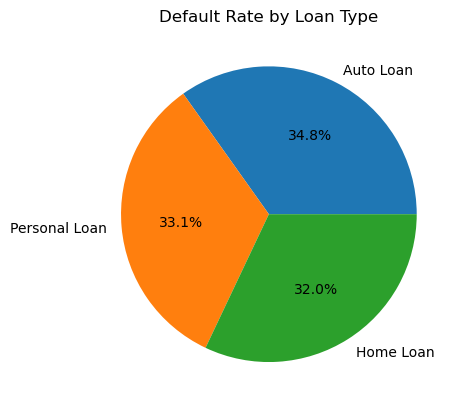

In [36]:
# Default rate by loan type

default_loan_type = df.groupby('LOAN_TYPE')['DEFAULT_FLAG'].mean().sort_values(ascending=False).round(3)
default_loan_type.plot(kind='pie',
                      autopct='%.1f%%')
plot.title('Default Rate by Loan Type')
plot.ylabel('')

### Insights:
* As per the above plot, customers with personal or auto loans tend to have a higher default rate as compared to customers with home loan.

C:\Users\Win10\AppData\Local\Temp\ipykernel_16912\2063031312.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_credit_score = df.groupby('CREDITSCORE_BAND')['DEFAULT_FLAG'].mean().round(3)


Text(0, 0.5, '')

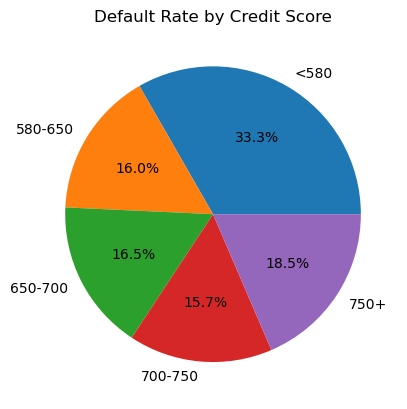

In [38]:
# Default rate by credit score band

bins = [0, 580, 650, 700, 750, 900]
labels = ["<580", "580-650", "650-700", "700-750", "750+"]

df['CREDITSCORE_BAND'] = pd.cut(df['CREDIT_SCORE'], bins=bins, labels=labels, right=False)

default_credit_score = df.groupby('CREDITSCORE_BAND')['DEFAULT_FLAG'].mean().round(3)
default_credit_score.plot(kind='pie',
                      autopct='%.1f%%')
plot.title('Default Rate by Credit Score')
plot.ylabel('')

### Insights:
* As expected, customers with credit score less than 580 defaulted more as compared to other credit score segments.
* Surprisingly, we can see a default rate of 18.5% amongst the customers having credit score more than 750. These customers may have defaulted initially but gradually kept on improving their credit score.
* A default rate between 15.5% to 16.5% can be observed for other credit score segments like 580-650, 650-700 and 700-750.

Text(0, 0.5, '')

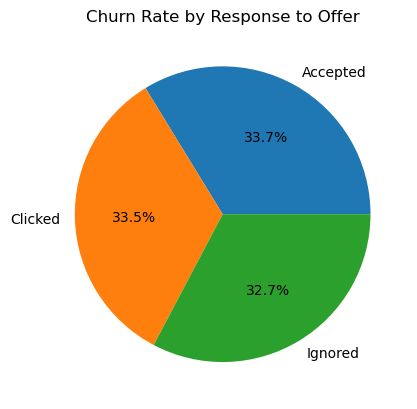

In [40]:
# Churn rate by response to offers

df.groupby('RESPONSE_TO_OFFERS')['CHURN_FLAG'].mean().sort_values(ascending=False).round(3).plot(kind='pie',
                                                                                                autopct='%.1f%%')
plot.title('Churn Rate by Response to Offer')
plot.ylabel('')

### Insights:

* Customers who clicked or accepted offers showed a churn rate of a little over 33%, while those who ignored offers had a churn rate of about 32.7%.
* This means that a customer’s response to offers does not strongly influence whether they stay or leave.

Text(0, 0.5, '')

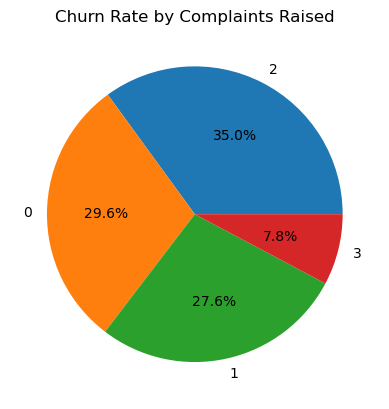

In [41]:
# Churn rate by complaints raised

df.groupby('COMPLAINTS_RAISED')['CHURN_FLAG'].mean().sort_values(ascending=False).round(3).plot(kind='pie',
                                                                                                autopct='%.1f%%')
plot.title('Churn Rate by Complaints Raised')
plot.ylabel('')

### Insights:

* Customers with 1 or 2 complaints had the highest churn rate, while customers with no complaints showed a churn rate of about 29.6%.
* Interestingly, customers who raised the most complaints had the lowest churn rate (7.8%). This could mean that their issues were resolved quickly and effectively, which increased their trust and loyalty towards the bank.
* Overall, this suggests that churn is not directly linked to the number of complaints, but rather to how well the bank handles and resolves them.

Text(0, 0.5, '')

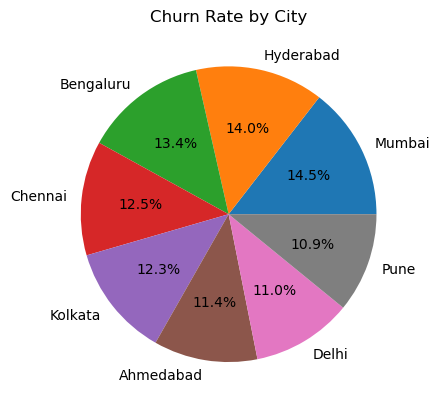

In [42]:
# Churn rate by city

df.groupby('CITY')['CHURN_FLAG'].mean().sort_values(ascending=False).round(3).plot(kind='pie',
                                                                                                autopct='%.1f%%')
plot.title('Churn Rate by City')
plot.ylabel('')

### Insights:

* Higher churn rate can be observed in the cities of Mumbai and Hyderabad while cities like Pune, Delhi & Ahmedabad witnessed lower churn rate.

In [43]:
# Customers with good income but no Insurance/FD

mask = (df["AVG_MONTHLY_INCOME"]>df["AVG_MONTHLY_INCOME"].median()) & (df["INSURANCE"]==0)
df.loc[mask, ["CUSTOMER_ID","AVG_MONTHLY_INCOME","INSURANCE","FD_INVESTMENT"]].head()

,CUSTOMER_ID,AVG_MONTHLY_INCOME,INSURANCE,FD_INVESTMENT
6,CUST0007,250543.881667,0,0
14,CUST0015,195943.336667,0,1338672
15,CUST0016,146113.054167,0,0
17,CUST0018,279883.926667,0,789030
18,CUST0019,215566.414167,0,0


C:\Users\Win10\AppData\Local\Temp\ipykernel_16912\1709952533.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df["CREDIT_UTILIZATION"], 5))["DEFAULT_FLAG"].mean().round(3).plot(kind='pie',


Text(0, 0.5, '')

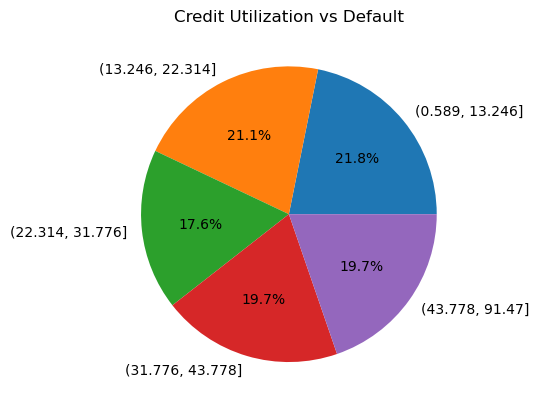

In [45]:
# Credit utilization vs default
df.groupby(pd.qcut(df["CREDIT_UTILIZATION"], 5))["DEFAULT_FLAG"].mean().round(3).plot(kind='pie',
                                                                                     autopct='%.1f%%')
plot.title('Credit Utilization vs Default')
plot.ylabel('')

### Insights:

* Customers with a credit utilization between ~13% and 22% had a churn rate of 21.1%.
* Customers with a very low credit utilization (below ~13%) showed a default rate of 21.8%.
* This suggests that both very low and moderate credit usage patterns can be early indicators of risk, either in the form of churn or default.

### 3. Correlation

In [32]:
from itertools import combinations

# Correlation matrix with target columns
corr = df[numeric_columns + [c for c in target_columns if df[c].dtype != 'O']].corr(numeric_only=True)
corr_targets = corr[target_columns].sort_values(by=target_columns, ascending=False)

# Top absolute correlations among features (to spot multicollinearity)
pairs = []
cols = corr.columns
for a, b in combinations(cols, 2):  
    val = corr.loc[a, b]
    pairs.append((a, b, abs(val), val))

top_pairs = sorted(pairs, key=lambda x: x[2], reverse=True)[:20]
pd.DataFrame(top_pairs, columns=["Feature_A","Feature_B","|corr|","corr"])

,Feature_A,Feature_B,|corr|,corr
0,AVG_MONTHLY_INCOME,AVG_MONTHLY_EXPENSE,0.996036,0.996036
1,AVG_MONTHLY_EXPENSE,AVG_BILLS_SPEND,0.994094,0.994094
2,AVG_MONTHLY_EXPENSE,AVG_RETAIL_SPEND,0.992610,0.992610
3,AVG_MONTHLY_INCOME,AVG_BILLS_SPEND,0.989371,0.989371
4,AVG_MONTHLY_INCOME,AVG_RETAIL_SPEND,0.989136,0.989136
5,AVG_MONTHLY_EXPENSE,AVG_TRAVEL_SPEND,0.977005,0.977005
6,AVG_RETAIL_SPEND,AVG_BILLS_SPEND,0.976147,0.976147
7,AVG_MONTHLY_INCOME,AVG_TRAVEL_SPEND,0.974755,0.974755
8,AVG_RETAIL_SPEND,AVG_TRAVEL_SPEND,0.971290,0.971290
9,AVG_TRAVEL_SPEND,AVG_BILLS_SPEND,0.956464,0.956464


### Insights
* 1. Income and Expenses are almost the same story
    * AVG_MONTHLY_INCOME and AVG_MONTHLY_EXPENSE have a correlation of 0.996.
    * This means whenever income goes up, expenses also go up almost in the same proportion.
    * Keeping both in a model might be redundant, so we can use just one of them or engineer a ratio (Expense-to-Income) instead.
* 2. Expenses and Spending Categories (Retail, Travel, Bills) are highly linked
    * Expenses are >0.99 correlated with Retail Spend, Bills Spend, and Travel Spend.
    * This shows that our total expense column is basically made up of these spending categories.
    * For modeling, including all of them would create multicollinearity. A smarter way is to keep total expenses and maybe one category to capture variation.
* 3. Spending categories also move together
    * Retail, Travel, and Bills spends all have correlations above 0.95 with each other.
    * This tells us that customers who spend more in one category also tend to spend more in the others.
    * We may want to combine these into a single “Total Card Spend” variable instead of using them separately.
* 4. Delinquency and Overdue Days are strongly related (0.74)
    * Customers with more delinquent incidents also tend to have higher overdue days.
    * For prediction, using both might be repetitive. It’s better to keep one or create a combined indicator of “repayment risk.”
* 5. Credit Score vs Delinquency/Overdue is negative
    * Correlation of -0.22 and -0.15 shows that as delinquency or overdue days go up, credit score tends to drop (makes sense logically).
    * This confirms the dataset reflects realistic behavior: poor repayment → lower credit score.
* 6. Credit Utilization and Delinquency are mildly positive (0.22)
    * Customers using more of their credit limit are slightly more likely to be delinquent.
    * This is a useful early warning sign for risk management.
* 7. Weak correlations for service usage and complaints
    * Complaints Raised, Net Banking Usage, and Mobile App Usage have very weak correlations (<0.1) with financial risk measures.
    * This means they don’t directly drive default risk, but they could be useful for churn prediction or customer satisfaction analysis.

* Our dataset shows clusters of features that tell the same story (e.g., income & expenses, spends & bills, delinquency & overdue).
* For modeling, we should avoid using all correlated features together because it can confuse the model. Instead, we should:
    * Keep one representative feature.
    * Or create ratios/combined indicators (e.g., Expense-to-Income ratio, Total Card Spend).
* The most business-relevant drivers of customer risk appear to be:
    * Expense-to-Income ratio.
    * Credit utilization.
    * Delinquency and overdue behavior.
    * Credit score (inverse relationship with delinquency).

### Conclusion

Through exploratory data analysis (EDA), we studied customer demographics, credit profiles, product holdings, transactions, and engagement patterns to better understand the factors linked to default and churn.
#### Problems Addressed:

**1. Customer Risk Segmentation**  
- Identified groups of customers at higher risk of default (e.g., those with 3–5 loans, lower credit scores, and higher delinquency counts).  
- Found that very low or moderate credit utilization also correlates with default and churn.  
**2. Product & Service Gaps**  
- Customers with multiple loans and high overdue days show higher financial stress.  
- Churn is more common among salaried and self-employed groups compared to students or unemployed customers.  
**3. Engagement & Retention Issues**  
- Response to marketing offers (accepted, clicked, or ignored) showed similar churn rates, suggesting current campaigns may not strongly influence retention.  
- Customers with 1–2 complaints had higher churn, while those with many complaints actually churned less — possibly because their issues were resolved properly.  
**4. Behavioral Insights**  
- Net banking and mobile app usage are generally healthy, but heavy users are not necessarily more loyal.  
- High-value customers (higher income and investments) are not fully secured from churn or default, showing service quality and experience matter equally.  
 
#### Recommendations for Stakeholders

**1. Risk Monitoring & Early Warning**  
- Closely monitor customers with 3–5 loans, high delinquency counts, and credit scores below 600.  
- Track under-utilizers (low credit usage) and moderate utilizers for hidden risk signals.  
**2. Retention Strategy**  
- Improve how complaints are handled, early complaint resolution may prevent churn.  
- Re-design marketing offers, since response (accept/click) is not strongly reducing churn today. Focus on personalized offers based on behavior instead of broad campaigns.  
**3. Customer Experience Improvements**  
- Proactively engage high-value customers (those with higher incomes and deposits) with exclusive services, loyalty programs, or priority banking to prevent defection.  
- Investigate high-expense customers, ensure they are not over-leveraged, but also offer them tailored financial products.  
**4. Operational Focus**  
- Strengthen collections strategy for customers with repeated delinquencies or high overdue days.  
- Track churn-prone segments like salaried and self-employed with regular health checks on accounts.  

In [46]:
df.head()

,CUSTOMER_ID,AGE,GENDER,INCOME_BRACKET,EMPLOYMENT_STATUS,CITY,CREDIT_SCORE,LOAN_HISTORY,CREDIT_UTILIZATION,SAVINGS_ACCOUNT,...,AVG_MONTHLY_INCOME,AVG_MONTHLY_EXPENSE,AVG_RETAIL_SPEND,AVG_TRAVEL_SPEND,AVG_BILLS_SPEND,DELINQUENCY_COUNT_12M,TOTAL_OVERDUE_DAYS_12M,OVER_BUDGET_RATIO,DEFAULT_FLAG,CREDITSCORE_BAND
0,CUST0001,59,Female,3-6 LPA,Salaried,Ahmedabad,562,No Loans,10.11,1,...,32002.633333,23262.615000,8640.141667,3700.469167,10922.001667,2,10,0.0,1,<580
1,CUST0002,49,Other,15-25 LPA,Salaried,Ahmedabad,656,3-5 Loans,33.48,1,...,198365.212500,138507.950000,51624.084167,20119.741667,66764.126667,1,30,0.0,0,650-700
2,CUST0003,35,Female,3-6 LPA,Self-Employed,Bengaluru,560,3-5 Loans,33.73,1,...,49154.954167,38447.845000,14018.418333,4676.601667,19600.621667,5,140,0.0,0,<580
3,CUST0004,63,Female,<3 LPA,Unemployed,Kolkata,664,1-2 Loans,38.47,1,...,8074.589167,5941.880833,2074.025000,1116.963333,2750.894167,1,30,0.0,0,650-700
4,CUST0005,28,Female,3-6 LPA,Self-Employed,Hyderabad,748,1-2 Loans,37.43,1,...,41412.081667,29206.231667,12136.246667,4498.485000,12571.502500,0,0,0.0,0,700-750


In [47]:
# dropping creditscore_band column

if 'CREDITSCORE_BAND' in df.columns:
    pass

In [48]:
df.to_csv('Customer360Clean.csv', index=False)

In [49]:
df.shape

(1000, 30)